# Assignment 2 Task C3
## visualisation of the data

The first visualisation which we do is stream data visualisation. The plot is basically the plot of air temperature vs the arrival time. Basically in this task we have made a consumer and the consumer would get the data which is sent by the kafka producer. The data which is obtained is then taken and a live stream plot is done for the same.

<IPython.core.display.Javascript object>


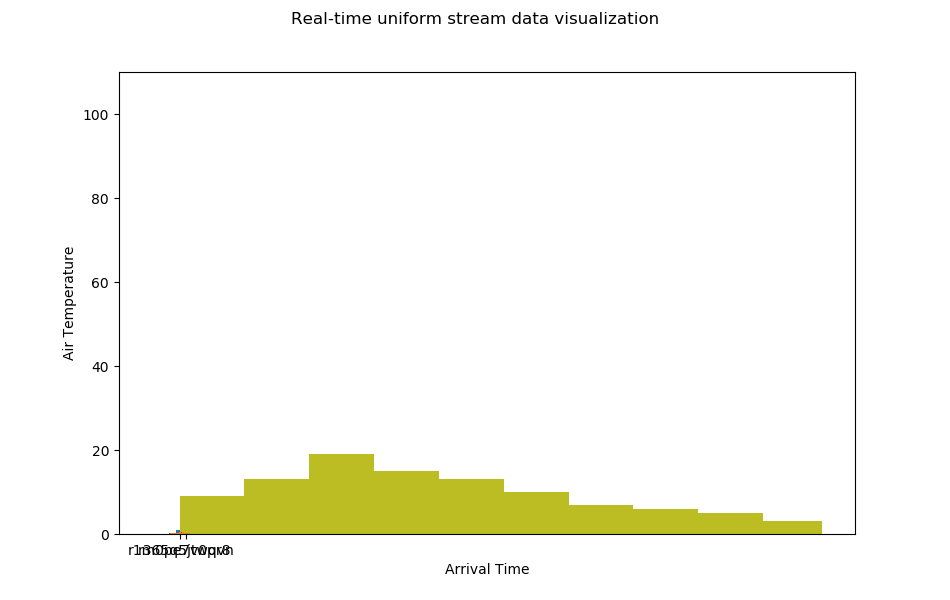

Expecting value: line 1 column 1 (char 0)


In [8]:
# import statements
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import json
import time
import matplotlib.pyplot as plt

# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

topic = 'climate_streaming'

def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=10000, # stop iteration if no message after 10 sec
                                   auto_offset_reset='earliest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=['localhost:9092'],
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

def init_plots():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        fig.suptitle('Real-time uniform stream data visualization') # giving figure a title
        ax.set_xlabel('Arrival Time')
        ax.set_ylabel('Air Temperature')
        ax.set_ylim(0,110) 
        ax.set_yticks([0,20,40,60,80,100])
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))
    
def consume_messages(consumer, fig, ax):
    try:
        # container for x and y values
        x, y = [], []
        # print('Waiting for messages')
        for message in consumer:
            data = json.loads(str(message))
            print("this is data",data)
            x.append(data['air_temperature_celcius'])
            y.append(time.ctime().split(" ")[3])
            # print(y)
            # we start plotting only when we have 10 data points
            ax.clear()
            ax.plot(x, y)
            ax.set_xlabel('Time')
            ax.set_ylabel('Value')
            ax.set_ylim(0,110) 
            ax.set_yticks([0,20,40,60,80,100])
            fig.canvas.draw()
            x.pop(0) # removing the item in the first position
            y.pop(0)
        plt.close('all')
    except Exception as ex:
        print(str(ex))
    
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    fig, ax = init_plots()
    consume_messages(consumer, fig, ax)
    
    

# Records with the top 10 number of fires. Plot a bar chart with time as the x-axis and number of fires as the y-axis.

In this case we first find the top 10 number of fires and then plot the same using a histogram plot.

the pygeohash library of python is used for doing the plot.

In [80]:
import pygeohash as pg
def geohash_dist(lat,lon):
    return pg.encode(lat,lon)

In [81]:
import sys
import operator
import time
import json
from pymongo import MongoClient
client = MongoClient()
db = client.fit5148_assignment_db

In [85]:

hotspot_data = db.hotspot_data
templis = []
for i in hotspot_data.find({},{'latitude':1, '_id':0, 'longitude':1}):
    templis.append(geohash_dist(i['latitude'], i['longitude']))
    
templis.sort()
dic = {}
for i in templis:
    dic[i] = templis.count(i)
sorted_x = sorted(dic.items(), key=operator.itemgetter(1), reverse=True)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.]),
 array([0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        , 1.03333333, 1.06666667, 1.1       , 1.13333333,
        1.16666667, 1.2       , 1.23333333, 1.26666667, 1.3       ,
        1.33333333, 1.36666667, 1.4       , 1.43333333, 1.46666667,
        1.5       ]),
 <a list of 30 Patch objects>)

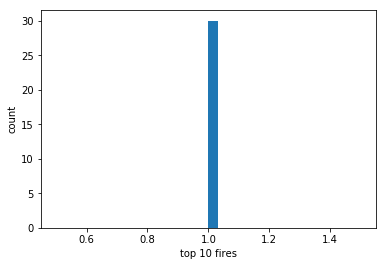

In [84]:
sorted_x[0]
import matplotlib.pyplot as plt
for i in range(len(sorted_x)):
    x = sorted_x[i][0]
    y = sorted_x[i][1]
plt.xlabel('top 10 fires')
plt.ylabel('count')
plt.hist(y, normed=True, bins=30)

## Plot of fire locations in the map with air temperature, surface temperature, relative humidity and confidence.


In this task we do a gmplot of the data which is there in both the table and display the data on the plot.

Firstly we have to fetch the required data from both the tables and store it in a format which can be used.

In [57]:
# for finding the date and surface temperature based on the date
hotspot_list = []
climate_list = []
for i in db.hotspot_data.find( {},{'_id':0, 'surface_temperature_celcius':1, 'confidence':1, 'latitude':1, 'longitude':1}):
    hotspot_list.append(i)
    
# for finding the air tempurature relative humidity and max wind speed based on the date 
for i in db.climate_data.find({},{'_id':0, 'air_temperature_celcius':1, 'relative_humidity':1, 'latitude':1, 'longitude':1}):
    climate_list.append(i)

Now that we have the required data we append it to a list so that we can use them for plotting.
Alls the data which is obtained is stored in a list

In [62]:
final_list=[]
for i in climate_list:
    for j in hotspot_list:
        if (i['latitude'] == j['latitude']) & (i['longitude']==j['longitude']):
            jsondict = {}
            jsondict['air_temperature_celcius'] = i['air_temperature_celcius']
            jsondict['relative_humidity'] = i['relative_humidity']
            jsondict['surface_temperature_celcius'] = j['surface_temperature_celcius']
            jsondict['confidence'] = j['confidence']
            jsondict['latitude'] = i['latitude']
            jsondict['longitude'] = i['longitude']
            final_list.append(jsondict)
        

In [ ]:
lat = []
lon = []
airtemp = []
relative_humidity = []
surface_temp=[]

for i in final_list:
    lat.append(float(i['latitude']))
    lon.append(float(i['longitude']))
    airtemp.append(i['air_temperature_celcius'])
    relative_humidity.append('surface_temperature_celcius')
    surface_temp.append('surface_temperature_celcius')

In this step we make a data source which stores the data and this would be used for displaying the data on the gmplot

In [75]:
from bokeh.models import ColumnDataSource
your_source = ColumnDataSource(data=dict(lat=lat, lon=lon, surfacetemp = surface_temp, relative_humidity= relative_humidity, airtemp=airtemp))

In [76]:
# The step below is required by the gmap scatter function to prepare data in correct format 

# Plotting the points on the map
gmap.scatter(lat, lon, '#FF4500', size=2, marker=True)

In [77]:
import webbrowser
# Drawing the map
gmap.draw("fire_locations.html")
webbrowser.open_new("fire_locations.html")

True

The visualisations tasks has thus been done for all the tasks